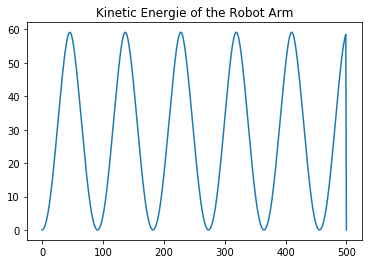

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import modern_robotics as mr

# Initializing Robot kinematic & inertial parameters

M01 = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0.089159], [0, 0, 0, 1]]
M12 = [[0, 0, 1, 0.28], [0, 1, 0, 0.13585], [-1, 0, 0, 0], [0, 0, 0, 1]]
M23 = [[1, 0, 0, 0], [0, 1, 0, -0.1197], [0, 0, 1, 0.395], [0, 0, 0, 1]]
M34 = [[0, 0, 1, 0], [0, 1, 0, 0], [-1, 0, 0, 0.14225], [0, 0, 0, 1]]
M45 = [[1, 0, 0, 0], [0, 1, 0, 0.093], [0, 0, 1, 0], [0, 0, 0, 1]]
M56 = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0.09465], [0, 0, 0, 1]]
M67 = [[1, 0, 0, 0], [0, 0, 1, 0.0823], [0, -1, 0, 0], [0, 0, 0, 1]]

G1 = np.diag([0.010267495893, 0.010267495893,  0.00666, 3.7, 3.7, 3.7])
G2 = np.diag([0.22689067591, 0.22689067591, 0.0151074, 8.393, 8.393, 8.393])
G3 = np.diag([0.049443313556, 0.049443313556, 0.004095, 2.275, 2.275, 2.275])
G4 = np.diag([0.111172755531, 0.111172755531, 0.21942, 1.219, 1.219, 1.219])
G5 = np.diag([0.111172755531, 0.111172755531, 0.21942, 1.219, 1.219, 1.219])
G6 = np.diag([0.0171364731454, 0.0171364731454, 0.033822, 0.1879, 0.1879, 0.1879])

Glist = [G1, G2, G3, G4, G5, G6]
Mlist = [M01, M12, M23, M34, M45, M56, M67] 
Slist = [[0,         0,         0,         0,        0,        0],
         [0,         1,         1,         1,        0,        1],
         [1,         0,         0,         0,       -1,        0],
         [0, -0.089159, -0.089159, -0.089159, -0.10915, 0.005491],
         [0,         0,         0,         0,  0.81725,        0],
         [0,         0,     0.425,   0.81725,        0,  0.81725]]

# Define simulation time [s] and integration steps per second

T = 15
steps = 100
dt = 1.0/steps
N = int(T/dt)

# Initialize theta(q1), dtheta(q2) list

q1 = np.zeros((N+1,6))
q2 = np.zeros((N+1,6))
tau = np.zeros((6,))
g = np.array([0,0,-9.81])
Ftip = np.zeros((6,))
EK = np.zeros((N+1,))

"""
mr.ForwardDynamics(
    thetalist,
    dthetalist,
    taulist,
    g,
    Ftip,
    Mlist,
    Glist,
    Slist,
)
Docstring:
Computes forward dynamics in the space frame for an open chain robot

:param thetalist: A list of joint variables
:param dthetalist: A list of joint rates
:param taulist: An n-vector of joint forces/torques
:param g: Gravity vector g
:param Ftip: Spatial force applied by the end-effector expressed in frame
             {n+1}
:param Mlist: List of link frames i relative to i-1 at the home position
:param Glist: Spatial inertia matrices Gi of the links
:param Slist: Screw axes Si of the joints in a space frame, in the format
              of a matrix with axes as the columns
:return: The resulting joint accelerations
This function computes ddthetalist by solving:
Mlist(thetalist) * ddthetalist = taulist - c(thetalist,dthetalist) - g(thetalist) - Jtr(thetalist) * Ftip

Example Input (3 Link Robot):
    thetalist = np.array([0.1, 0.1, 0.1])
    dthetalist = np.array([0.1, 0.2, 0.3])
    taulist = np.array([0.5, 0.6, 0.7])
    g = np.array([0, 0, -9.8])
    Ftip = np.array([1, 1, 1, 1, 1, 1])
    M01 = np.array([[1, 0, 0,        0],
                    [0, 1, 0,        0],
                    [0, 0, 1, 0.089159],
                    [0, 0, 0,        1]])
    M12 = np.array([[ 0, 0, 1,    0.28],
                    [ 0, 1, 0, 0.13585],
                    [-1, 0, 0,       0],
                    [ 0, 0, 0,       1]])
    M23 = np.array([[1, 0, 0,       0],
                    [0, 1, 0, -0.1197],
                    [0, 0, 1,   0.395],
                    [0, 0, 0,       1]])
    M34 = np.array([[1, 0, 0,       0],
                    [0, 1, 0,       0],
                    [0, 0, 1, 0.14225],
                    [0, 0, 0,       1]])
    G1 = np.diag([0.010267, 0.010267, 0.00666, 3.7, 3.7, 3.7])
    G2 = np.diag([0.22689, 0.22689, 0.0151074, 8.393, 8.393, 8.393])
    G3 = np.diag([0.0494433, 0.0494433, 0.004095, 2.275, 2.275, 2.275])
    Glist = np.array([G1, G2, G3])
    Mlist = np.array([M01, M12, M23, M34])
    Slist = np.array([[1, 0, 1,      0, 1,     0],
                      [0, 1, 0, -0.089, 0,     0],
                      [0, 1, 0, -0.089, 0, 0.425]]).T
Output:
    np.array([-0.97392907, 25.58466784, -32.91499212])
"""

def RugenKutta4Ord(dt,q1_0,q2_0):
    
    K1 = np.zeros((2,6))
    K1[0,:] = dt*q2_0
    K1[1,:] = dt*mr.ForwardDynamics(q1_0, q2_0, tau, g, Ftip, Mlist, Glist, Slist)
    q1_1 = q1_0+K1[0,:]/2
    q2_1 = q2_0+K1[1,:]/2
    
    K2 = np.zeros((2,6))
    K2[0,:] = dt*q2_1
    K2[1,:] = dt*mr.ForwardDynamics(q1_1, q2_1, tau, g, Ftip, Mlist, Glist, Slist)
    q1_2 = q1_0 + K2[0,:]/2
    q2_2 = q2_0 + K2[1,:]/2
    
    K3 = np.zeros((2,6))
    K3[0,:] = dt*q2_2
    K3[1,:] = dt*mr.ForwardDynamics(q1_2, q2_2, tau, g, Ftip, Mlist, Glist, Slist)
    q1_3 = q1_0 + K3[0,:]
    q2_3 = q2_0 + K3[1,:]
    
    K4 = np.zeros((2,6))
    K4[0,:] = dt*q2_3
    K4[1,:] = dt*mr.ForwardDynamics(q1_3, q2_3, tau, g, Ftip, Mlist, Glist, Slist)
    
    q_n = np.vstack((q1_0,q2_0)) + K1/6 + K2/3 + K3/3 + K4/6
    return q_n
    
for i in range(N):
    
    M = mr.MassMatrix(q1[i],Mlist,Glist,Slist)
    EK[i] = 1./2 * np.dot(np.dot(q2[i], M), q2[i])
    q_n = RugenKutta4Ord(dt, q1[i], q2[i])
    q1[i+1] = q_n[0,:]
    q2[i+1] = q_n[1,:]

plt.plot(EK)
plt.title("Kinetic Energie of the Robot Arm")
np.savetxt("simulation1.csv", q1, delimiter=',')